# Predicitve models using scikit-learn

This ipynb consist of some predictive models developed using scikit-learn and their evaluation using different metrics. 

---

### Import packages and dependencies 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import os

In [2]:
sns.set(style = 'white')
%matplotlib inline

In [3]:
# import scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Read data files

In [4]:
# Input data files are available in the "../data" directory.
print(os.listdir("../data"))

['.DS_Store', 'transformed_data.csv', 'Telco-Customer-Churn.csv', 'processed_data.csv', 'scaled_data.csv', '.ipynb_checkpoints']


In [5]:
# read processed data 
telco_customer = pd.read_csv('../data/Telco-Customer-Churn.csv')
processed_data = pd.read_csv('../data/processed_data.csv')

In [6]:
processed_data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [7]:
def plot_confusion_matrix(test_labels, predicted_labels):
    '''
    Computes confusion matrix and then plots using seaborn.
    input: test_labels(), predicted lables
    return: plot's the confusion matrix
    '''
    cm = confusion_matrix(y_test,predicted_labels)
    ax = sns.heatmap(cm, annot=True, fmt="d",linewidths=.5,cmap="YlGnBu")
    plt.title('Confusion Matrix',fontsize=17)
    plt.xlabel('Predicted',fontsize=15)
    plt.ylabel('True',fontsize=15)
    
    return plt.show()

In [8]:
# store labels in variable y
y = processed_data['Churn'].values
# store features in variables x
X = processed_data.drop(columns = ['Churn'])

### Split Train and Test Data

In [9]:
def split_data_in_train_test(dataset, test_size, shuffle = None):
    '''
    This function splits the given dataset into train and test sets, with/ without shuffling.
    
    Parameters: 
    - dataset: matrices/ list/ array
                Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
    - test_size: int or float
                Should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
    - shuffle : boolean, defualt is None
                Whether or not to shuffle the data before splitting.

    '''
    
    # store labels in variable y
    y = dataset['Churn'].values
    # store features in variables x
    X = dataset.drop(columns = ['Churn'])
    
    # Create train & test data using train_test_split from scikit-learn
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        shuffle= shuffle, random_state=101)
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25, shuffle= True)

### Models:
We will develop following models one after the other by developing intuition:
- Logistic Regression, 
- Random Forest, 
- SVM, 
- ADA Boost
- XG Boost

**1. Logistic Regression**

In [11]:
# get in the scaled data
scaled_data = pd.read_csv('../data/scaled_data.csv')

In [12]:
# divide the data (processed_data and scaled_data) in train and test

#X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25)
X_train, X_test, y_train, y_test = split_data_in_train_test(scaled_data, 0.25)

#### Building logistic regression model

In [13]:
# Intializing logistic regression
model = LogisticRegression()
# filt the model to data
result = model.fit(X_train, y_train)
# Get prediction on test set
prediction_test = model.predict(X_test)

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Print the prediction accuracy
print ('Accuracy on test data:',metrics.accuracy_score(y_test, prediction_test))

Accuracy on test data: 0.8145620022753128


In [17]:
# Get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)

AxesSubplot(0.125,0.125;0.775x0.755)


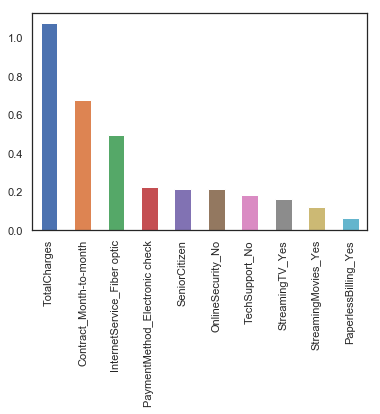

In [18]:
# Top 10 variables as per weight in this model
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


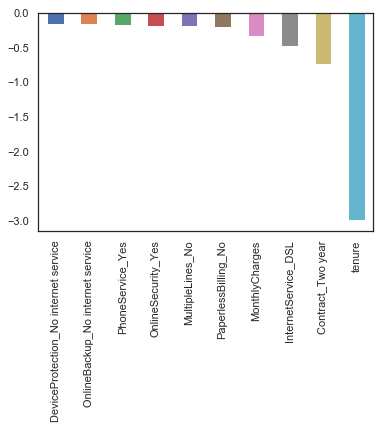

In [19]:
# Least 10 variables as per weight in this model
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Confusion Matrix for Logistic Regression Model:


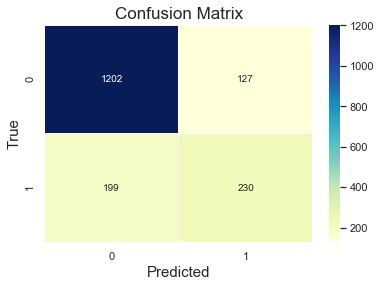

In [20]:
print('Confusion Matrix for Logistic Regression Model:')
plot_confusion_matrix(y_test,prediction_test)

**2. Random Forest**

In [21]:
# divide the data (processed_data and scaled_data) in train and test

#X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25)
X_train, X_test, y_train, y_test = split_data_in_train_test(scaled_data, 0.25)

#### Building Random Forest classifier

In [22]:
# intialize the model
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
# fit model to the data
model_rf.fit(X_train, y_train)

# Make predictions on test set
prediction_test = model_rf.predict(X_test)

In [23]:
# Print the prediction accuracy
print ('Accuracy on test data:',metrics.accuracy_score(y_test, prediction_test))

Accuracy on test data: 0.8179749715585893


In [24]:
# Get the feature importance
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)

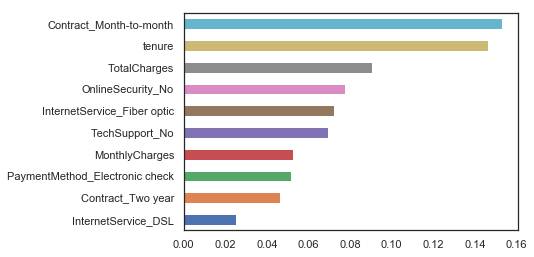

In [25]:
weights.sort_values()[-10:].plot(kind = 'barh')

Confusion Matrix for Random Forest Model:


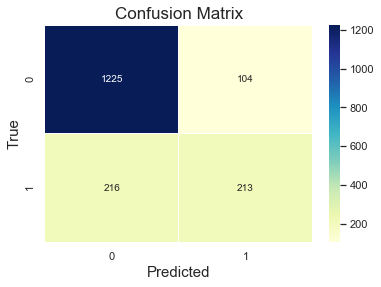

In [26]:
print('Confusion Matrix for Random Forest Model:')
plot_confusion_matrix(y_test,prediction_test)

**3. Support Vecor Machine (SVM)**

In [27]:
# divide the data (processed_data and scaled_data) in train and test

#X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25)
X_train, X_test, y_train, y_test = split_data_in_train_test(scaled_data, 0.25)

**Building SVM**

In [28]:
# intialize the model
model.svm = SVC(kernel='linear') 
# fit the model to data
model.svm.fit(X_train,y_train)
# get predictions on test data 
preds = model.svm.predict(X_test)

In [29]:
# Get the prediction accuracy
svm_acc = metrics.accuracy_score(y_test, preds)
print('Accuracy on test data:',svm_acc)

Accuracy on test data: 0.8065984072810012


In [30]:
# Create the Confusion matrix
print(confusion_matrix(y_test,preds))  

[[1200  129]
 [ 211  218]]


Confusion Matrix for SVM Model:


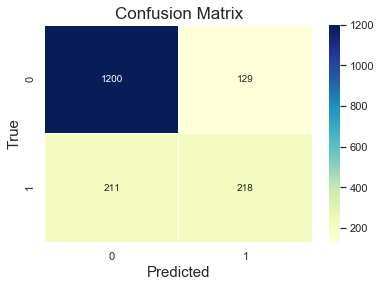

In [31]:
print('Confusion Matrix for SVM Model:')
plot_confusion_matrix(y_test,preds)

**4. ADA Boost**

In [32]:
# divide the data (processed_data and scaled_data) in train and test

#X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25)
X_train, X_test, y_train, y_test = split_data_in_train_test(scaled_data, 0.25)

**AdaBoost Algorithm**

In [34]:
# Initialize AdaBoost model
model = AdaBoostClassifier()

n_estimators = 50
# base_estimator = DecisionTreeClassifier

# fit the model to data
model.fit(X_train,y_train)

# Get prediction on test set
preds = model.predict(X_test)

In [35]:
# Print the accuracy
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy on test data:',accuracy)

Accuracy on test data: 0.8179749715585893


In [36]:
# create the confusion matrix
print(confusion_matrix(y_test,preds))  

[[1209  120]
 [ 200  229]]


Confusion Matrix for AdaBoost Model:


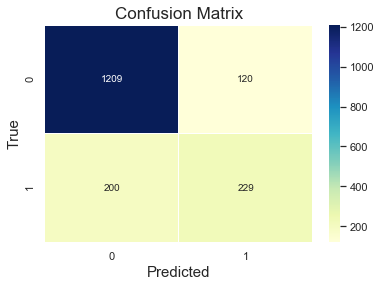

In [37]:
print('Confusion Matrix for AdaBoost Model:')
plot_confusion_matrix(y_test,preds)

**5. XG Boost**

In [38]:
# divide the data (processed_data and scaled_data) in train and test

#X_train, X_test, y_train, y_test = split_data_in_train_test(processed_data, 0.25)
X_train, X_test, y_train, y_test = split_data_in_train_test(scaled_data, 0.25)

**Build XG Boost**

In [39]:
# intialize the XG Boost
model = XGBClassifier()
# fit the model to data
model.fit(X_train, y_train)
# get prediction on test data
preds = model.predict(X_test)

In [42]:
# Print the accuracy
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy on test data:',accuracy)

Accuracy on test data: 0.8174061433447098


In [43]:
# create the confusion matrix
print(confusion_matrix(y_test,preds))  

[[1213  116]
 [ 205  224]]


Confusion Matrix for XG Boost Model:


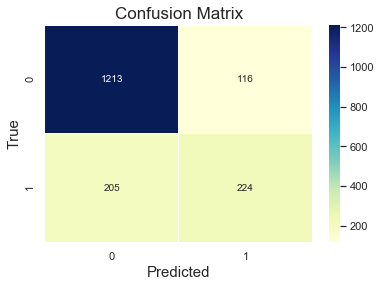

In [44]:
print('Confusion Matrix for XG Boost Model:')
plot_confusion_matrix(y_test,preds)